## import libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [12]:
df=pd.read_csv("/kaggle/input/fraud-dataset/trainval.csv")

# Explor DataSet


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,70320.0,-1.440536,-0.157661,1.951210,3.375675,1.076378,-1.049474,0.043954,0.063408,-1.379699,...,0.163049,0.035337,0.071452,0.710874,0.425002,0.353786,-0.007267,0.108108,62.38,0
1,36855.0,-0.268054,-0.026194,1.862894,-1.989876,-0.551961,-0.310759,0.277641,-0.160598,1.790869,...,0.201588,1.162627,-0.333368,0.171281,0.136557,-0.488836,0.063452,-0.095439,25.95,0
2,42436.0,-3.873686,2.279104,0.434901,-3.173945,-0.504830,0.029066,0.757593,-1.322265,2.122661,...,-0.771537,-1.354687,0.149311,-0.385015,-0.752701,0.449522,-3.542555,-1.439570,17.00,0
3,163977.0,-0.368752,0.922792,1.353228,2.461567,1.451856,2.942073,-0.074470,0.868245,-1.287337,...,0.445099,1.458492,-0.033405,-1.841053,-0.690577,0.123031,0.028285,0.027508,0.00,0
4,130811.0,2.258621,-1.431942,-0.567731,-1.431582,-1.627116,-0.924648,-1.228725,-0.224030,-1.030023,...,-0.137722,0.117330,0.253277,0.026271,-0.289235,-0.179701,0.024791,-0.042692,25.00,0


Note:
- 
- All Features are anonymous except [time,amount,class]
- can't use domain knowledge 

In [4]:
df.shape

(56960, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56960 entries, 0 to 56959
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    56960 non-null  float64
 1   V1      56960 non-null  float64
 2   V2      56960 non-null  float64
 3   V3      56960 non-null  float64
 4   V4      56960 non-null  float64
 5   V5      56960 non-null  float64
 6   V6      56960 non-null  float64
 7   V7      56960 non-null  float64
 8   V8      56960 non-null  float64
 9   V9      56960 non-null  float64
 10  V10     56960 non-null  float64
 11  V11     56960 non-null  float64
 12  V12     56960 non-null  float64
 13  V13     56960 non-null  float64
 14  V14     56960 non-null  float64
 15  V15     56960 non-null  float64
 16  V16     56960 non-null  float64
 17  V17     56960 non-null  float64
 18  V18     56960 non-null  float64
 19  V19     56960 non-null  float64
 20  V20     56960 non-null  float64
 21  V21     56960 non-null  float64
 22

- may can change dtype of time to datetime 

# Check Null Values

In [6]:
df.isnull().sum().sum()

0

# Check Duplicated Values

In [7]:
df.duplicated().sum()

62

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

# Statistical Summary 

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,56898.000000,56898.000000,56898.000000,56898.000000,56898.000000,56898.000000,56898.000000,56898.000000,56898.000000,56898.000000,...,56898.000000,56898.000000,56898.000000,56898.000000,56898.000000,56898.000000,56898.000000,56898.000000,56898.000000,56898.000000
mean,94606.766424,0.009834,0.008233,0.004532,-0.002752,0.003995,-0.005180,-0.007076,0.000360,0.003302,...,-0.001875,0.001137,-0.004476,0.003466,0.001925,0.000023,0.001591,-0.002376,86.756019,0.001564
std,47564.843787,1.925973,1.609767,1.491008,1.413917,1.349426,1.325232,1.180992,1.204280,1.092654,...,0.728485,0.726620,0.626823,0.606301,0.518851,0.482847,0.387277,0.304980,232.128252,0.039519
min,4.000000,-35.274010,-44.639245,-31.813586,-5.416315,-29.730600,-21.248752,-31.197329,-50.943369,-9.462573,...,-22.665685,-8.887017,-44.807735,-2.822684,-10.295397,-2.241620,-8.260909,-8.656570,0.000000,0.000000
25%,53912.250000,-0.915249,-0.600666,-0.887744,-0.856486,-0.687643,-0.773929,-0.557248,-0.208838,-0.639674,...,-0.228310,-0.542076,-0.162479,-0.352516,-0.315334,-0.327160,-0.070985,-0.053026,5.570000,0.000000
50%,84553.500000,0.027312,0.068869,0.184471,-0.030475,-0.052824,-0.283915,0.037560,0.023561,-0.050676,...,-0.028130,0.009813,-0.013012,0.042963,0.016924,-0.055670,0.001015,0.011137,21.900000,0.000000
75%,139366.750000,1.318565,0.810768,1.023860,0.746455,0.614874,0.389932,0.568827,0.331070,0.601617,...,0.187498,0.531135,0.146984,0.445197,0.352091,0.240230,0.089606,0.077567,76.000000,0.000000
max,172788.000000,2.418802,17.418649,4.101716,12.699542,31.457046,21.307738,31.527244,20.007208,10.370658,...,27.202839,7.220158,18.364472,3.951679,5.473885,2.991210,10.507884,15.866721,11789.840000,1.000000


# Features_Distribution

In [11]:
fraud=df["Class"]==1
non_fraud=df["Class"]==0

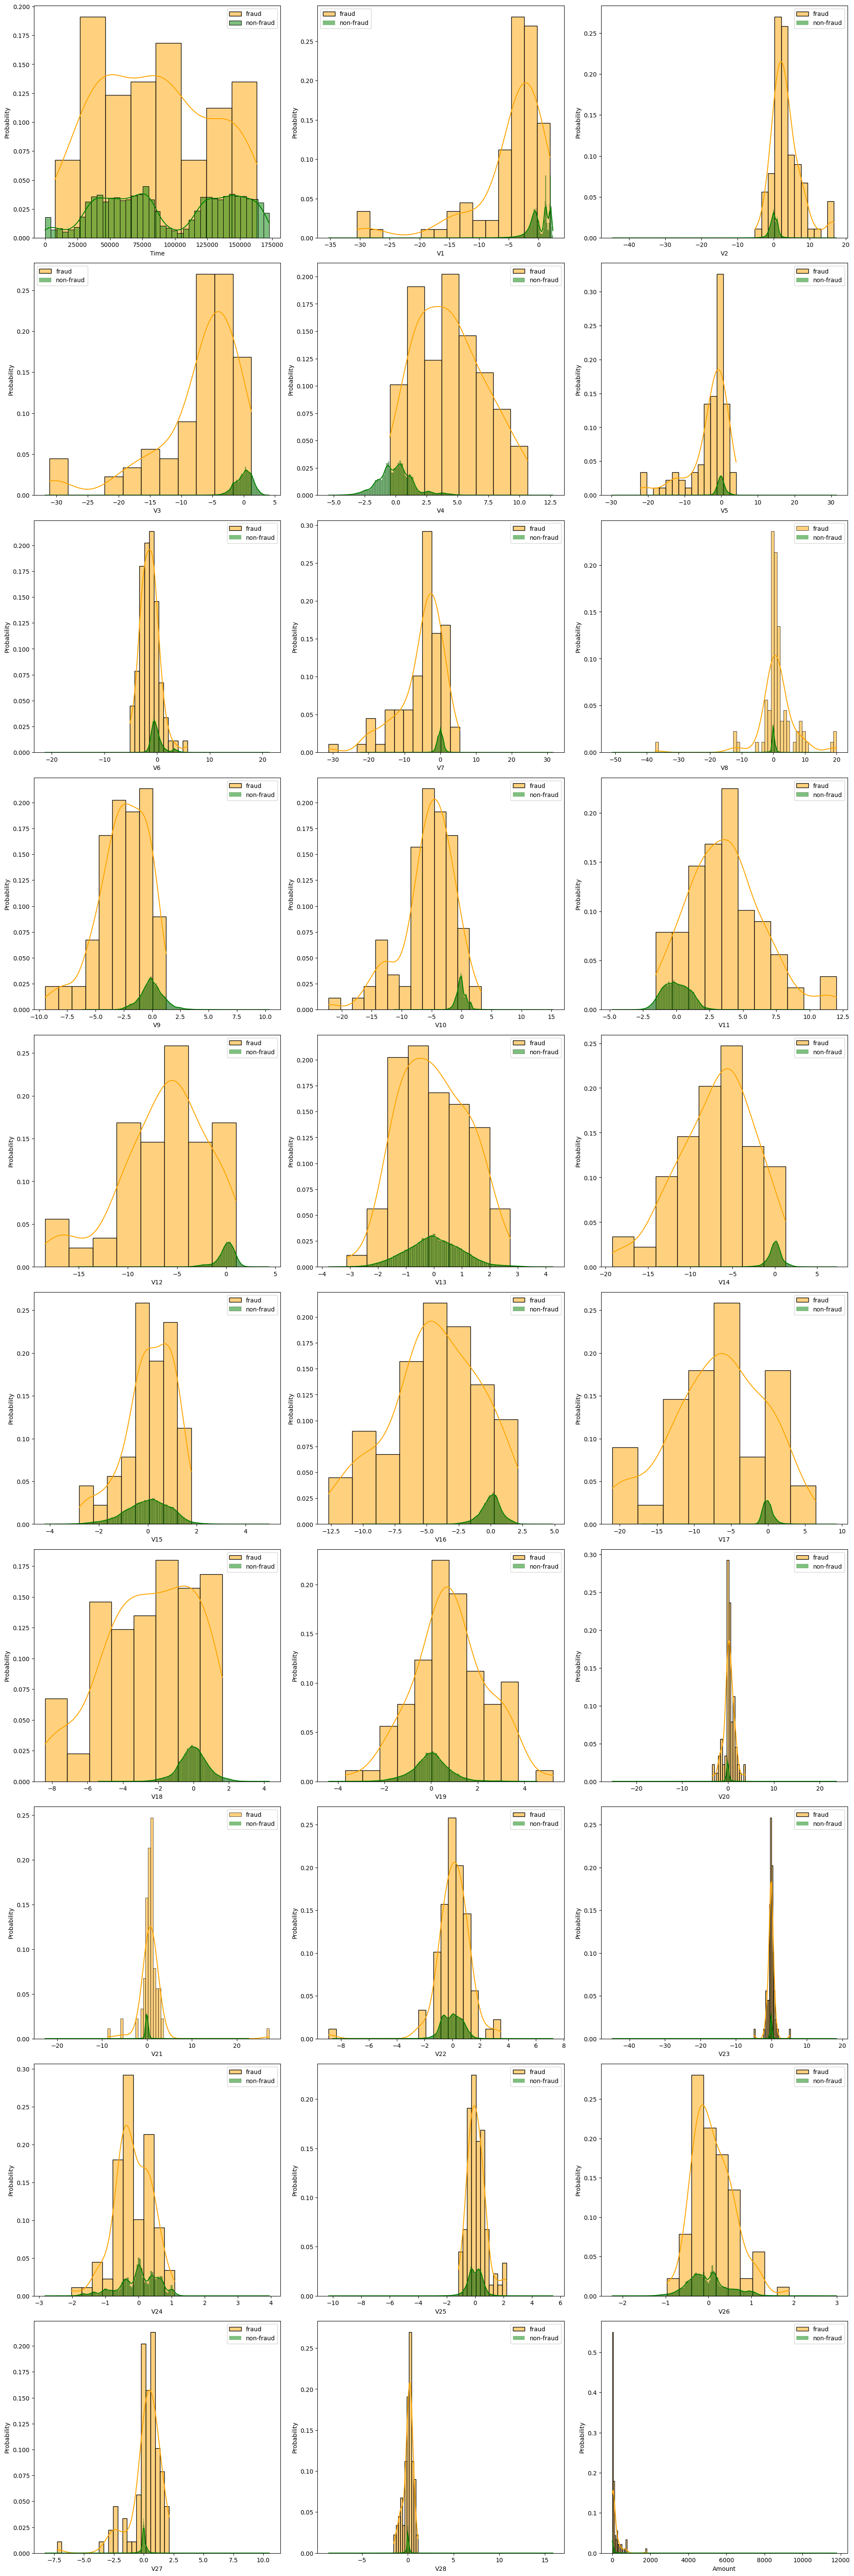

In [12]:
plt.figure(figsize=(20,60))
for i,col in enumerate (df.columns):
    if col=="Class":
        continue
    else:
      plt.subplot(10,3,i+1)
      sns.histplot(data=df,x=df[col][fraud],color="orange",kde=True,label='fraud',stat="probability")  
      sns.histplot(data=df,x=df[col][non_fraud],color="g",kde=True,label='non-fraud',stat="probability")
      plt.legend()
        
plt.tight_layout()
plt.show()
        
 
    

-  Amount:
   -  Non-fraud transaction show high density in lower amount
   -  Fraud transaction show low density but higher amount 

# Outlier Detection

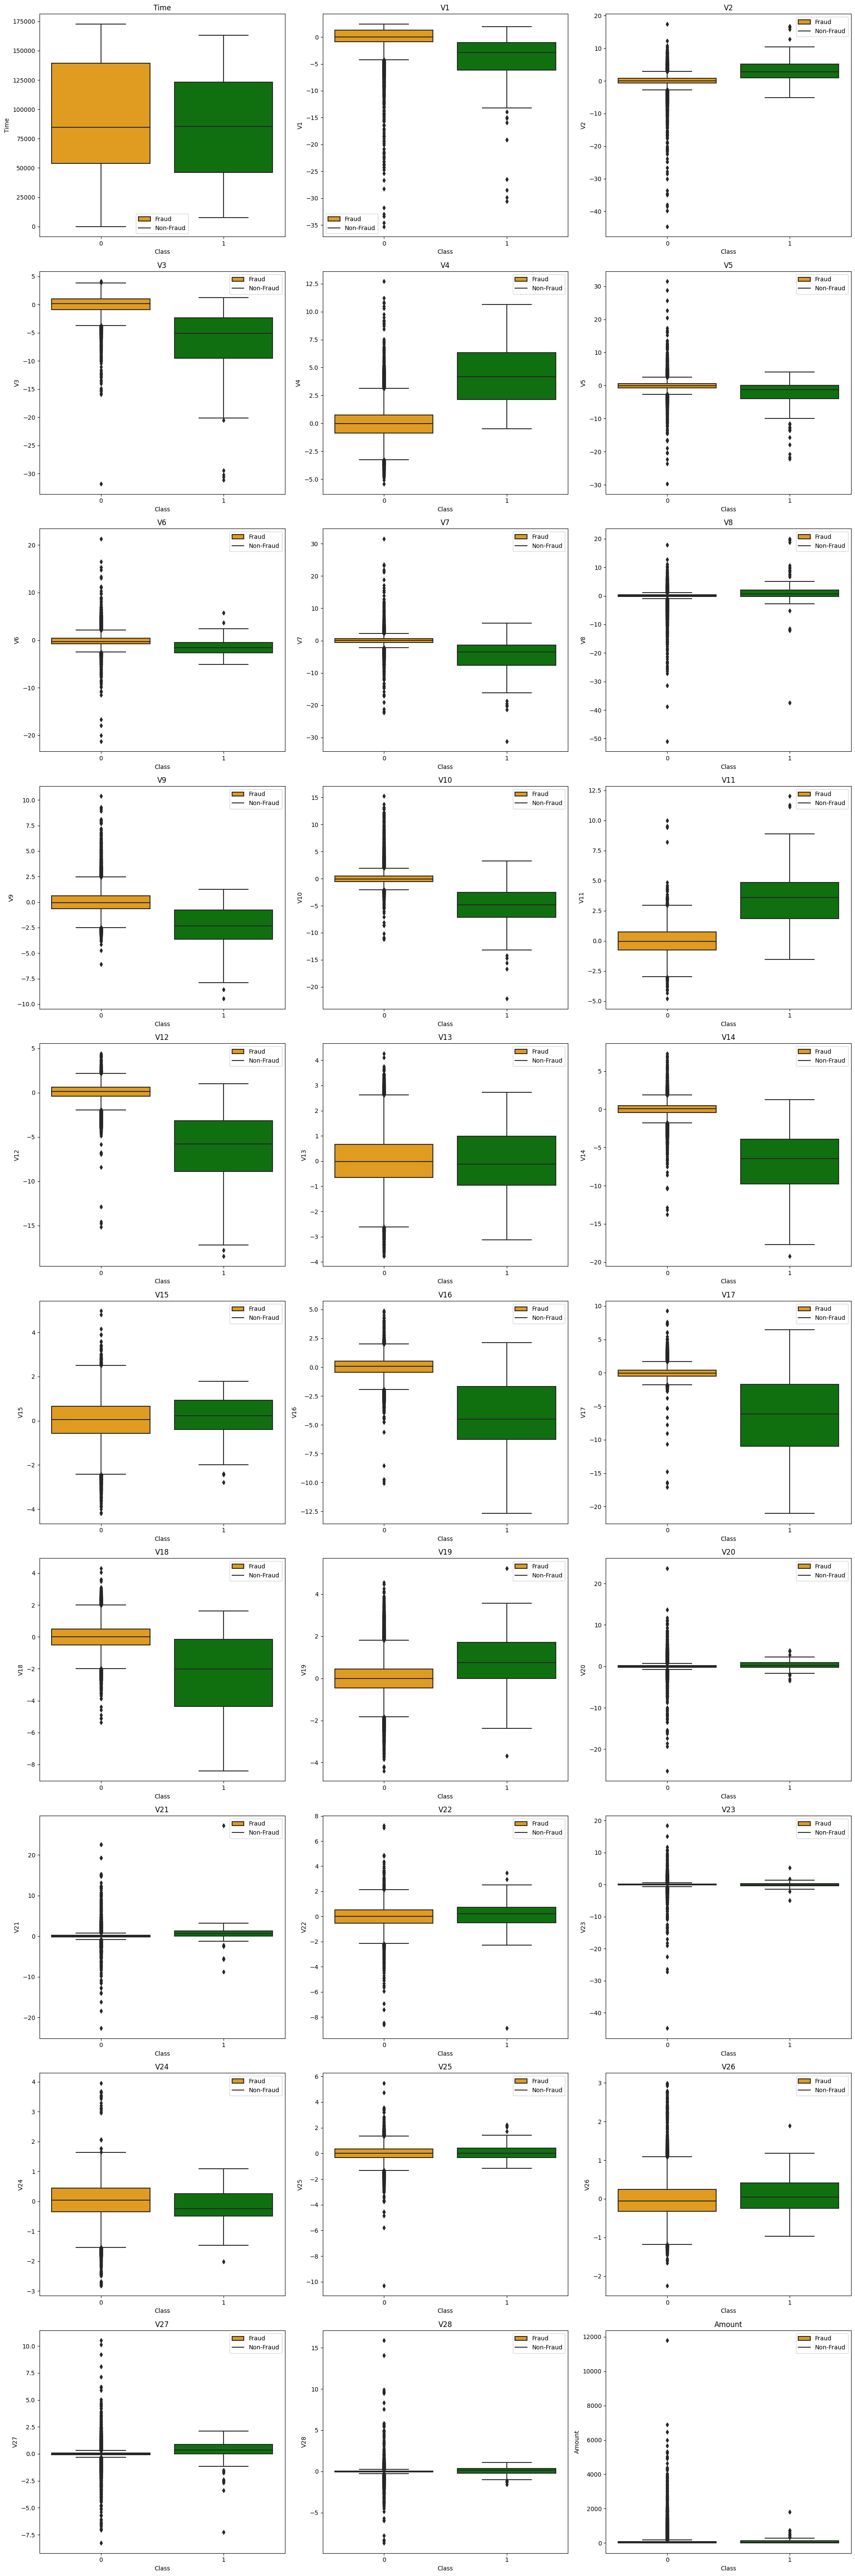

In [13]:
plt.figure(figsize=(20,60))
for i,col in enumerate (df.columns):
    if col=="Class":
        continue
    else:
      plt.subplot(10,3,i+1)
      sns.boxplot(data=df,x='Class',y=col,palette=["orange","green"])
      plt.title(col)
      plt.xlabel('Class')
      plt.ylabel(col)
      plt.legend(labels=['Fraud','Non-Fraud'])
        
plt.tight_layout()
plt.show()

# Target Distribution

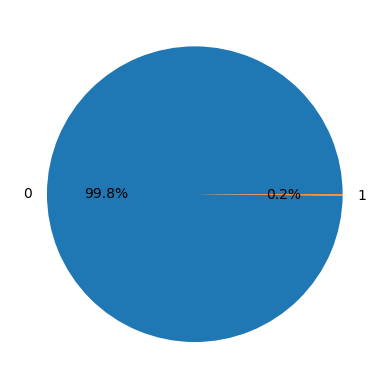

In [14]:
class_count=df["Class"].value_counts()
plt.pie(class_count,labels=class_count.index,autopct='%1.1f%%')
plt.show()

# Correlation Matrix

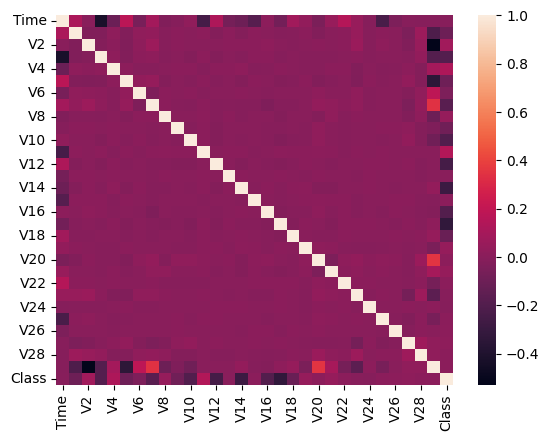

In [25]:
corr=df.corr()
sns.heatmap(corr)

plt.show()

In [27]:
corr["Class"].sort_values(ascending=False)

Class     1.000000
V11       0.143640
V4        0.123006
V2        0.086214
V21       0.044130
V19       0.040968
V8        0.039608
V27       0.015983
V20       0.012756
V26       0.009297
V25       0.008242
Amount    0.007304
V15       0.003908
V22       0.003818
V28       0.002912
V13       0.000260
V23      -0.005394
Time     -0.008129
V24      -0.011284
V6       -0.041976
V9       -0.091483
V5       -0.094227
V1       -0.101831
V18      -0.113910
V7       -0.174584
V3       -0.189356
V16      -0.200182
V10      -0.204371
V12      -0.249192
V14      -0.288247
V17      -0.326290
Name: Class, dtype: float64

# Importance Features

In [15]:
x_df=df.drop("Class",axis=1)
x=x_df.values
y_df=df["Class"]
y=y_df.values

In [16]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x,y)
importance=model.feature_importances_
feature_importance=pd.DataFrame({
    "feature":x_df.columns,
     "importance":importance
})

In [28]:
f_i_sorted=feature_importance.sort_values(by="importance",ascending=False)

In [29]:
f_i_sorted

,feature,importance
17,V17,0.178962
12,V12,0.168906
14,V14,0.104236
10,V10,0.087353
16,V16,0.073149
11,V11,0.060410
4,V4,0.026106
9,V9,0.025952
3,V3,0.022021
18,V18,0.019118


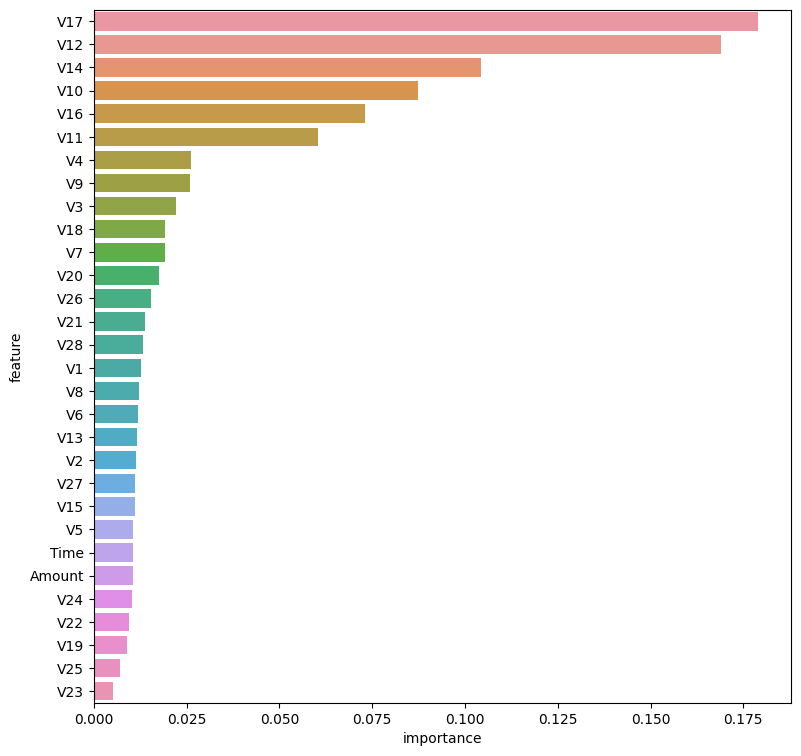

In [30]:
plt.figure(figsize=(9,9))
sns.barplot(x='importance', y='feature', data=f_i_sorted)
plt.show()
